## Loading Images

In [1]:
#Loading Libraries
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils

In [2]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08','09','10']
instances = ['01','02','03','04','05','06','07','08','09','10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [3]:
os.listdir('D:/Lipreading/concatenated_images(5x5)')

['F01',
 'F02',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'M01',
 'M02',
 'M04',
 'M07',
 'M08']

In [4]:
from skimage.transform import resize
import time

In [5]:
import os
import time
import imageio
import numpy as np
from skimage.transform import resize

# Define constants
MAX_WIDTH = 100
MAX_HEIGHT = 100
#max_seq_length = 40  # Updated to match the desired sequence length

t1 = time.time()

UNSEEN_TEST_SPLIT = ['F04','F07', 'M01']

# people1 = ['F01', 'F02', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'M01', 'M02', 'M04', 'M07', 'M08']
# data_types1 = ['words']
# folder_enum1 = ['01', '02', '03', '04', '05']

X_train, X_test = [], []
y_train, y_test = [], []

directory = "./concatenated_images(5x5)"

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
            print(f"Word : '{words[word_index]}'")
            path = os.path.join(directory, person_id, data_type, word)
            filelist = sorted(os.listdir(path + '/'))
            sequence = []
            print(filelist)
            for img_name in filelist:
                image = imageio.imread(path + '/' + img_name)
                image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                image = 255 * image
                # Convert to integer data type pixels.
                image = image.astype(np.uint8)
                sequence = image
            # pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))] #* (max_seq_length - len(sequence))
            # sequence.extend(pad_array)  # * (max_seq_length - len(sequence)))
            # # sequence = np.array(sequence)
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')

t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those concatenated lip images : {t2 - t1} secs.")

Word : 'Begin'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Choose'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Connection'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Navigation'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Next'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Previous'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']


C:\Users\satvi\AppData\Local\Temp\ipykernel_16388\2668427588.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + '/' + img_name)


Word : 'Start'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Stop'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Hello'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Web'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Finished reading images for person F01. Time taken : 0.3216278553009033 secs.
Word : 'Begin'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Choose'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Connection'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Navigation'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jp

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
print(X_train.shape)
print(X_test.shape)

(1200, 100, 100)
(300, 100, 100)


In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1200,)
(300,)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8
 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9
 9 9 9 9]


In [10]:
def normalize_it(X):
    v_min = X.min(axis=(1, 2), keepdims=True)
    v_max = X.max(axis=(1, 2), keepdims=True)

    # Calculate the range and replace zero values with epsilon to avoid division by zero
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)

    # Normalize the data
    X_normalized = np.where(range_values == 0, 0, (X - v_min) / range_values)

    return X_normalized

In [11]:
from keras.utils import to_categorical


In [12]:
X_train = normalize_it(X_train)
X_test = normalize_it(X_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [13]:
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [14]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [15]:
print(X_train.shape)
print(X_test.shape)

(1200, 100, 100, 1)
(300, 100, 100, 1)


In [16]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1200, 10)
(300, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [17]:
df = pd.DataFrame(y_test)
# Display the entire matrix
print(df)


       0    1    2    3    4    5    6    7    8    9
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
295  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
297  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
298  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

[300 rows x 10 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier24 = RandomForestClassifier(n_estimators=1000, max_depth=90, random_state=42)
pipeline24 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier24)
])
#pipeline24.fit(X_train_features, np.argmax(y_train, axis=1))


## Model-3-pca

In [ ]:
from keras.models import load_model
from keras.models import Model
import numpy as np
from skimage.transform import resize
import imageio

# Load the saved ResNet model
resnet_model = load_model("D:/Lipreading/resnet/resnet_model.h5")

# Create a model that outputs features from the last convolutional block
feature_extractor = Model(inputs=resnet_model.input, outputs=resnet_model.get_layer("flatten").output)

def extract_features(model, X):
    X_resized = np.stack([resize(img, (100, 100, 1)) for img in X])
    features = model.predict(X_resized)
    return features

# Extract features for training and test datasets
X_train_features = extract_features(feature_extractor, X_train)
X_test_features = extract_features(feature_extractor, X_test)

print("Shape of extracted features:", X_train_features.shape, X_test_features.shape)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

print("Shape of PCA features:", X_train_pca.shape, X_test_pca.shape)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc

# Train SVM
svm = SVC(kernel='linear')  # You can experiment with different kernels
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm)
 ])
pipeline1.fit(X_train_pca, np.argmax(y_train, axis=1))
y_train_pred = pipeline1.predict(X_train_pca)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance
y_pred = pipeline1.predict(X_test_pca)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC curve
fpr_3, tpr_3, _ = roc_curve(np.random.randint(0, 2, 100), np.random.random(100))  # Replace with actual data
roc_auc_3 = auc(fpr_3, tpr_3)  # Replace with actual AUC value

## Model-6 -PCA

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=100)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42)
pipeline_pca96 = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca96.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')

# Plot ROC curve
y_score_pca = pipeline_pca.predict_proba(X_test_features_pca)
fpr_6, tpr_6, _ = roc_curve(np.random.randint(0, 2, 100), np.random.random(100))  # Replace with actual data
roc_auc_6 = auc(fpr_6, tpr_6) 


## PCA=100

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


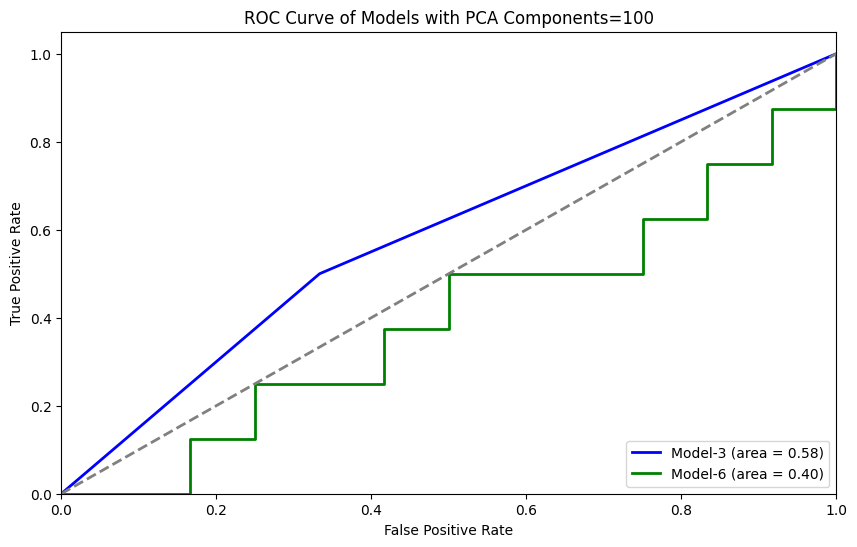

In [25]:
from keras.models import load_model
from keras.models import Model
import numpy as np
from skimage.transform import resize
import imageio
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC  # Import SVC

# Load the saved ResNet model
resnet_model = load_model("D:/Lipreading/resnet/resnet_model.h5")

# Create a model that outputs features from the last convolutional block
feature_extractor = Model(inputs=resnet_model.input, outputs=resnet_model.get_layer("flatten").output)

def extract_features(model, X):
    X_resized = np.stack([resize(img, (100, 100, 1)) for img in X])
    features = model.predict(X_resized)
    return features

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Extract features for training and test datasets using ResNet model
X_train_features_resnet = extract_features(feature_extractor, X_train)
X_test_features_resnet = extract_features(feature_extractor, X_test)

# Apply PCA for ResNet model features
pca_resnet = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca_resnet = pca_resnet.fit_transform(X_train_features_resnet)
X_test_pca_resnet = pca_resnet.transform(X_test_features_resnet)

# Train SVM
svm = SVC(kernel='linear', probability=True)  # Added probability=True for ROC
pipeline_resnet = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm)
 ])
pipeline_resnet.fit(X_train_pca_resnet, y_train)

# Evaluate performance on test set
y_test_pred_resnet = pipeline_resnet.predict(X_test_pca_resnet)
y_test_proba_resnet = pipeline_resnet.predict_proba(X_test_pca_resnet)[:, 1]

# ROC curve for ResNet model
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_test_proba_resnet)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features using Inception-V3 model
X_train_features_inception = inception_v3_base_model.predict(X_train)
X_test_features_inception = inception_v3_base_model.predict(X_test)

# Apply PCA for Inception model features
pca_inception = PCA(n_components=100)  # You can adjust the number of components as needed
X_train_pca_inception = pca_inception.fit_transform(X_train_features_inception)
X_test_pca_inception = pca_inception.transform(X_test_features_inception)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42)
pipeline_inception = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_inception.fit(X_train_pca_inception, y_train)

# Evaluate performance on testing set
y_test_pred_inception = pipeline_inception.predict(X_test_pca_inception)
y_test_proba_inception = pipeline_inception.predict_proba(X_test_pca_inception)[:, 1]

# ROC curve for Inception model
fpr_inception, tpr_inception, _ = roc_curve(y_test, y_test_proba_inception)
roc_auc_inception = auc(fpr_inception, tpr_inception)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label='Model-3 (area = %0.2f)' % roc_auc_resnet)
plt.plot(fpr_inception, tpr_inception, color='green', lw=2, label='Model-6 (area = %0.2f)' % roc_auc_inception)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Models with PCA Components=100')
plt.legend(loc="lower right")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Training Accuracy (with PCA): 100.0 %
Training Precision (with PCA): 100.0 %
Training Recall (with PCA): 100.0 %
Training F1 Score (with PCA): 100.0 %
Testing Accuracy (with PCA): 60.0 %
Testing Precision (with PCA): 36.0 %
Testing Recall (with PCA): 60.0 %
Testing F1 Score (with PCA): 44.99999999999999 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


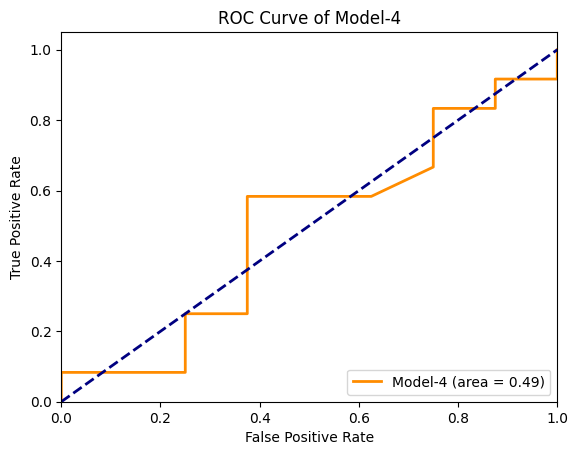

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42)
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for testing set
y_score_pca = pipeline_pca.predict_proba(X_test_features_pca)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_score_pca[:, 1])  # Considering only the positive class
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curve
plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='Model-4 (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Model-4')
plt.legend(loc="lower right")
plt.show()


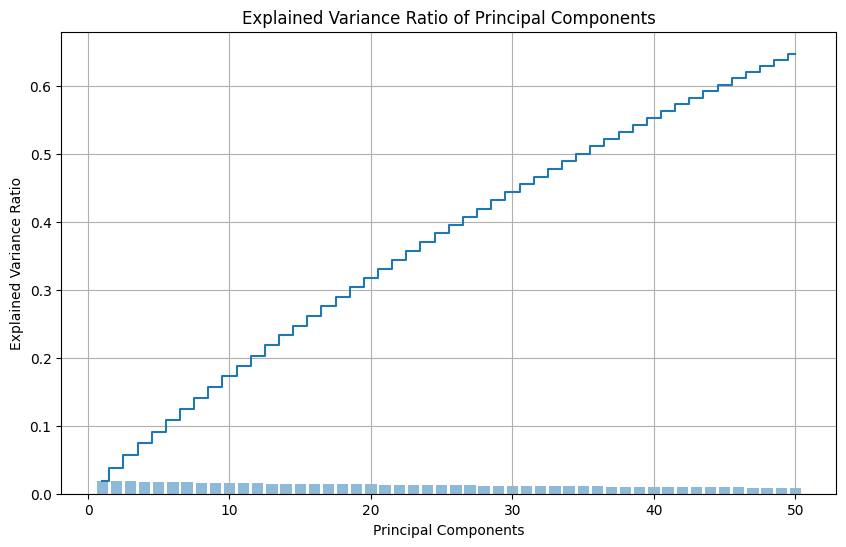

In [19]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)

# Visualize explained variance ratio of principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()


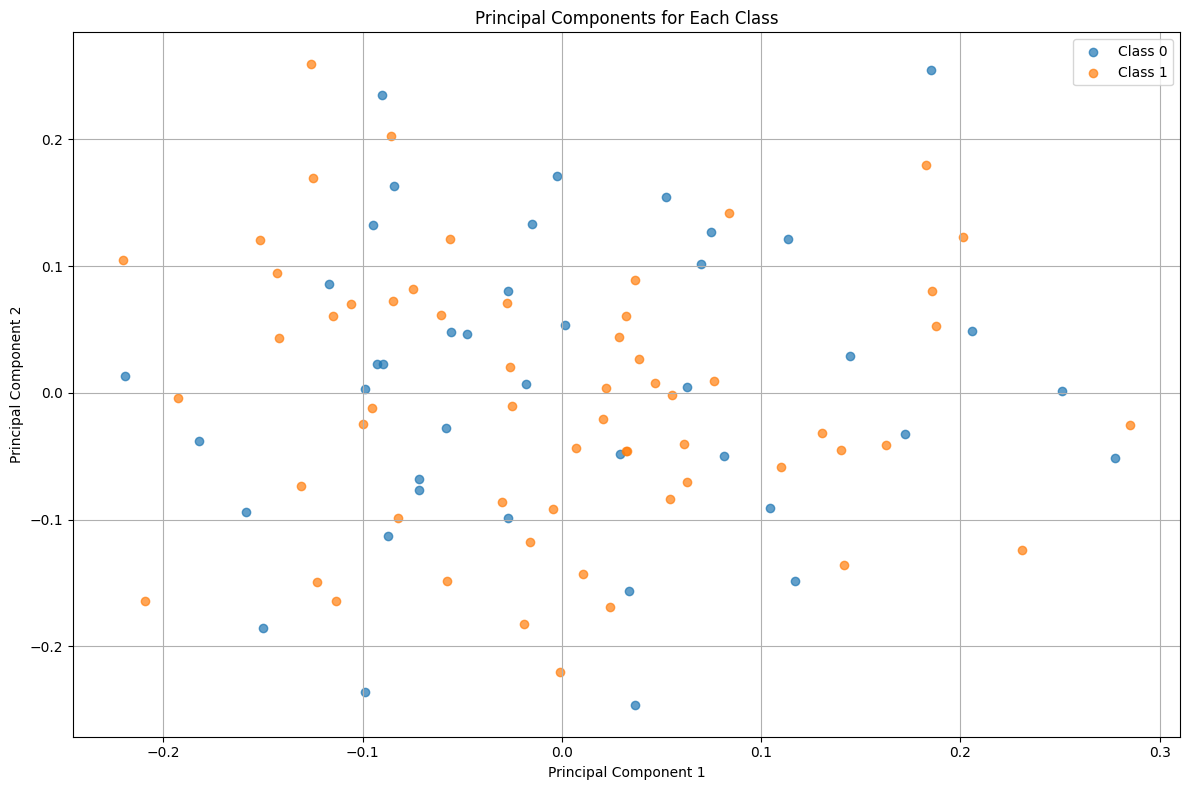

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_features_pca has already been computed from your previous code

# Perform PCA to reduce dimensionality to 50 components
pca = PCA(n_components=100)
X_train_features_pca = pca.fit_transform(X_train_features)

# Separate components for each class
num_classes = 10
class_features = [[] for _ in range(num_classes)]  # List to store features for each class

# Split features based on class labels
for i in range(len(y_train)):
    class_label = y_train[i]
    class_features[class_label].append(X_train_features_pca[i])

# Convert lists to numpy arrays and ensure they are 2D
class_features = [np.array(class_features[i]) for i in range(num_classes) if len(class_features[i]) > 0]
class_features = [arr.reshape(arr.shape[0], -1) for arr in class_features]

# Plotting the principal components for each class in a single figure
plt.figure(figsize=(12, 8))

for i in range(len(class_features)):
    plt.scatter(class_features[i][:, 0], class_features[i][:, 1], label=f'Class {i}', alpha=0.7)

plt.title('Principal Components for Each Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ROC - 10 Classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 43.666666666666664 %
Testing Precision: 53.04883014883014 %
Testing Recall: 43.666666666666664 %
Testing F1 Score: 40.92354549568702 %


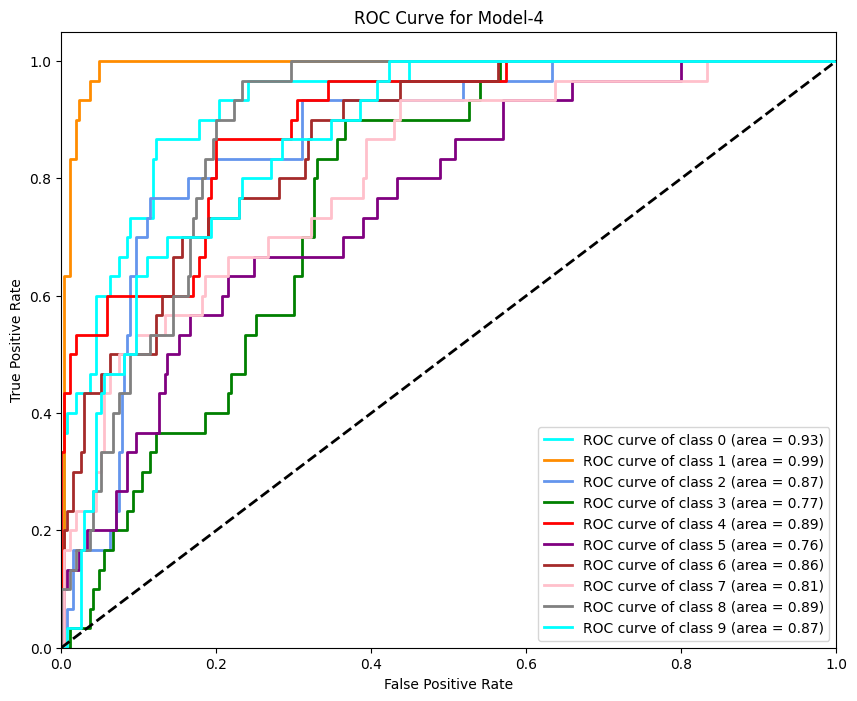

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Add, Activation
from tensorflow.keras.models import Model
from itertools import cycle

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier)
])
pipeline1.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline1.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline1.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline1.decision_function(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-4')
plt.legend(loc="lower right")
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 40.666666666666664 %
Testing Precision: 49.46832661363555 %
Testing Recall: 40.666666666666664 %
Testing F1 Score: 40.84266652191213 %


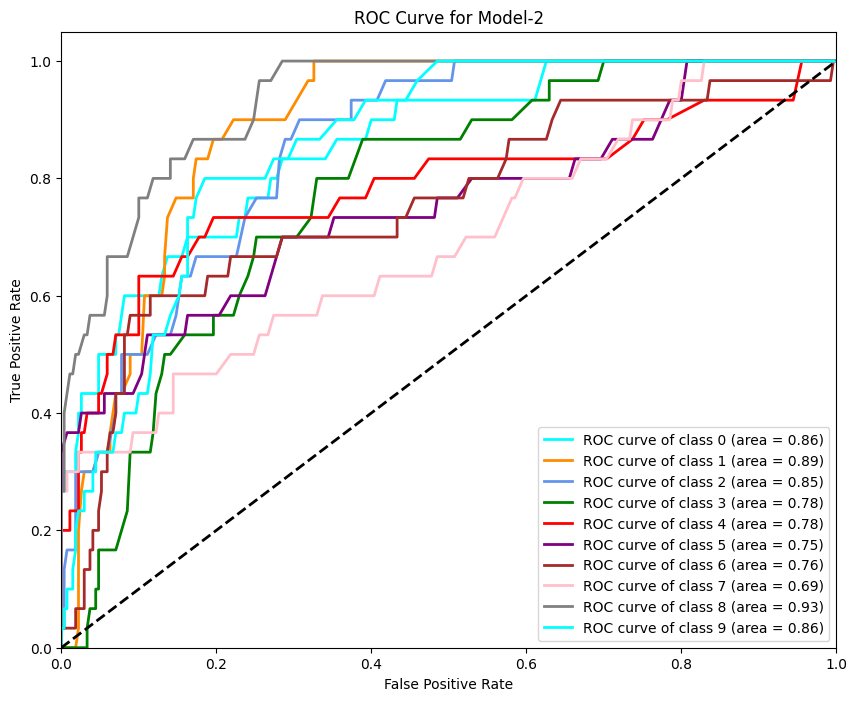

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier25 = RandomForestClassifier(n_estimators=1000, max_depth=90, random_state=32)
pipeline25 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier25)
])
pipeline25.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline25.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline25.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline25.predict_proba(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-2')
plt.legend(loc="lower right")
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 45.666666666666664 %
Testing Precision: 49.9544672702865 %
Testing Recall: 45.666666666666664 %
Testing F1 Score: 44.55949834674017 %


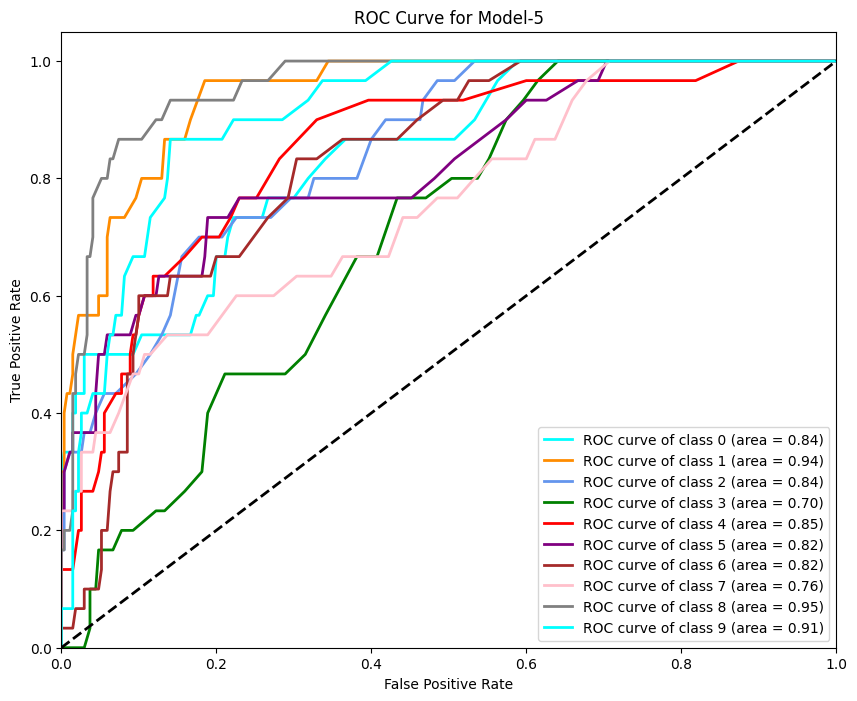

In [25]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier23 = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42)
pipeline23 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier23)
])
pipeline23.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline23.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline23.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline23.predict_proba(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-5')
plt.legend(loc="lower right")
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 37.333333333333336 %
Testing Precision: 50.80807350544193 %
Testing Recall: 37.333333333333336 %
Testing F1 Score: 34.338660951581836 %


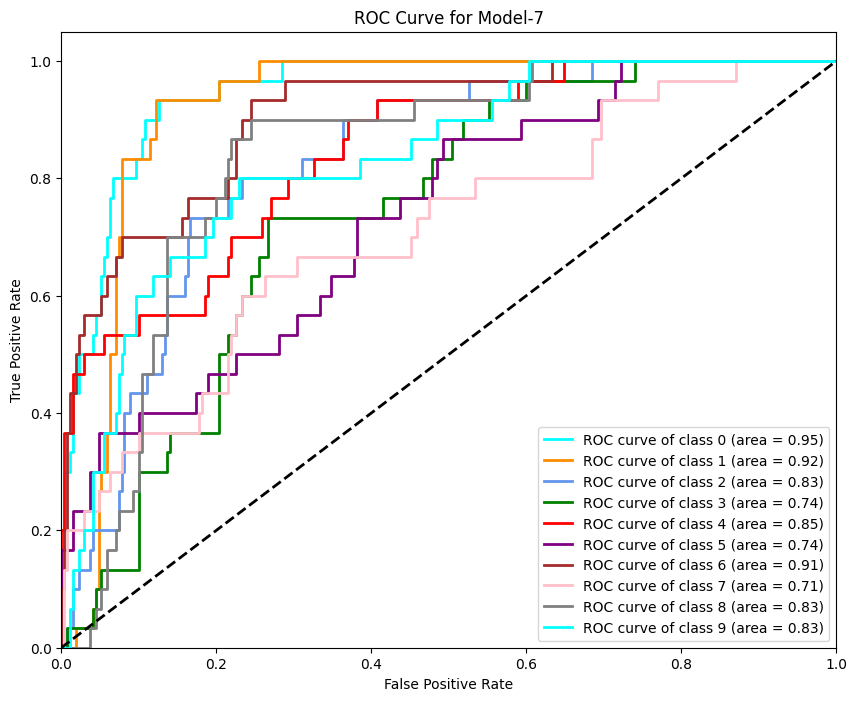

In [22]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from itertools import cycle


# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train SVM classifier
svm_classifier2 = SVC(kernel='linear')
pipeline2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier2)
])
pipeline2.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline2.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline2.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline2.decision_function(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-7')
plt.legend(loc="lower right")
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 555ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 34.0 %
Testing Precision: 49.720875422336384 %
Testing Recall: 34.0 %
Testing F1 Score: 33.2183495630135 %


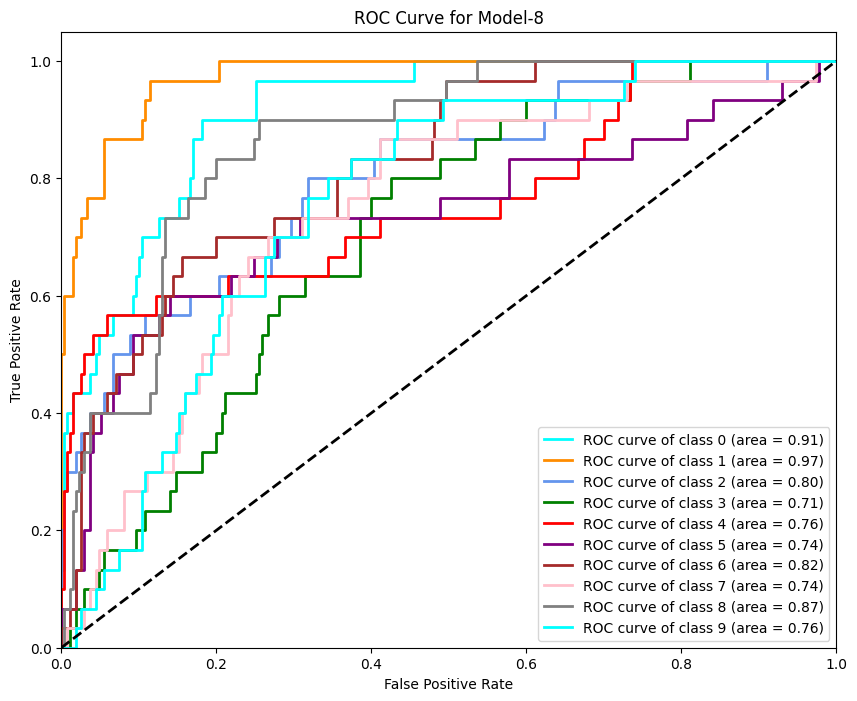

In [23]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model with Batch Normalization and Dropout
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Assuming X_train and X_test are already defined and preprocessed
# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train SVM classifier
svm_classifier4 = SVC(kernel='linear')
pipeline4 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier4)
])
pipeline4.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline4.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline4.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline4.decision_function(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-8')
plt.legend(loc="lower right")
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 498ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 503ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 37.666666666666664 %
Testing Precision: 49.53887327939132 %
Testing Recall: 37.666666666666664 %
Testing F1 Score: 37.93986002327242 %


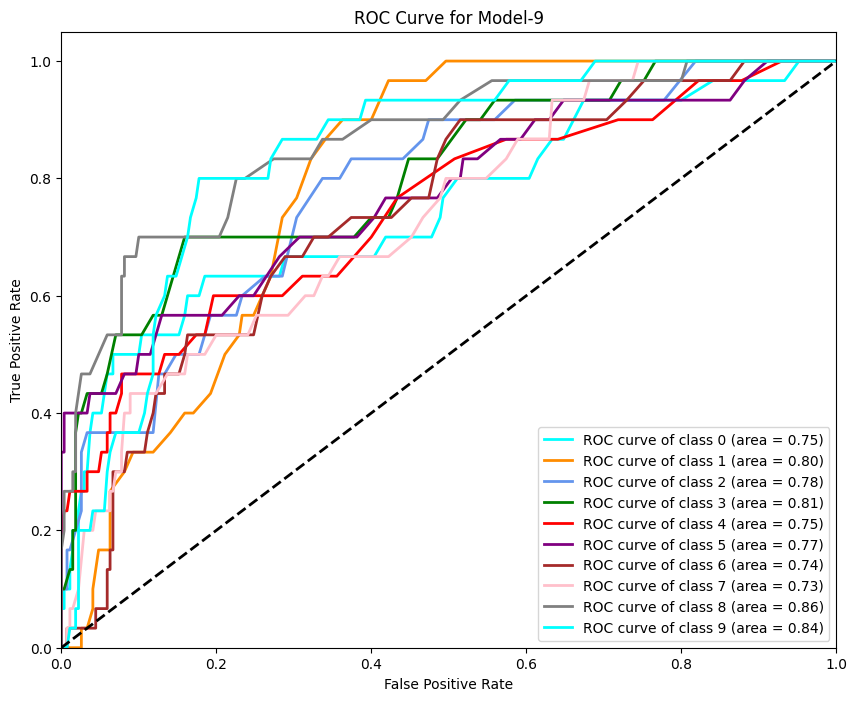

In [24]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier20 = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42)
pipeline20 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier20)
])
pipeline20.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline20.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline20.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline20.predict_proba(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-9')
plt.legend(loc="lower right")
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 27.333333333333332 %
Testing Precision: 29.48392143326643 %
Testing Recall: 27.333333333333332 %
Testing F1 Score: 24.46318765813697 %


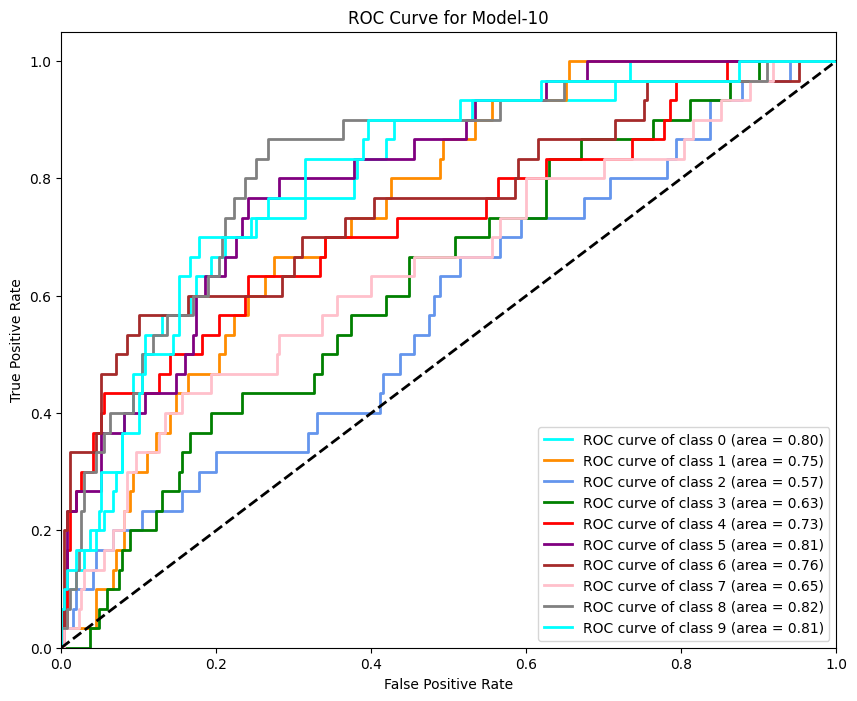

In [26]:
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier33 = SVC(kernel='linear', C=1.0)
pipeline33 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier33)
])
pipeline33.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline33.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline33.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline33.decision_function(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-10')
plt.legend(loc="lower right")
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 21.0 %
Testing Precision: 28.63068913068913 %
Testing Recall: 21.0 %
Testing F1 Score: 18.947630383956106 %


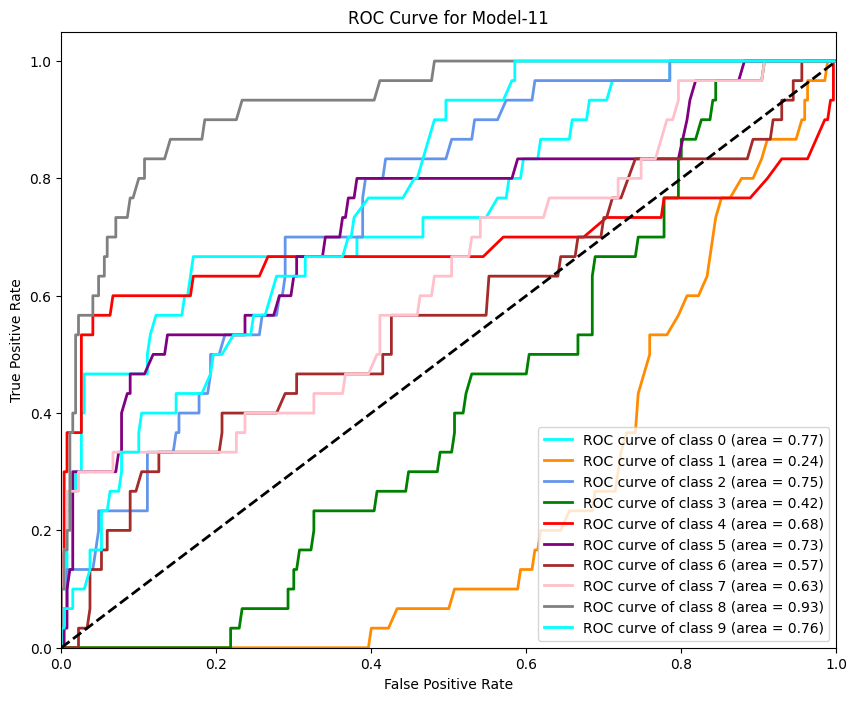

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier28 = RandomForestClassifier(n_estimators=2000, max_depth=30, random_state=42)
pipeline28 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier28)
])
pipeline28.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline28.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline28.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = pipeline28.predict_proba(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-11')
plt.legend(loc="lower right")
plt.show()

## ROC-10 Classes-PCA

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step 
Training Accuracy with PCA: 100.0 %
Training Precision with PCA: 100.0 %
Training Recall with PCA: 100.0 %
Training F1 Score with PCA: 100.0 %
Testing Accuracy with PCA: 37.666666666666664 %
Testing Precision with PCA: 47.18598545254374 %
Testing Recall with PCA: 37.666666666666664 %
Testing F1 Score with PCA: 34.83423836525371 %


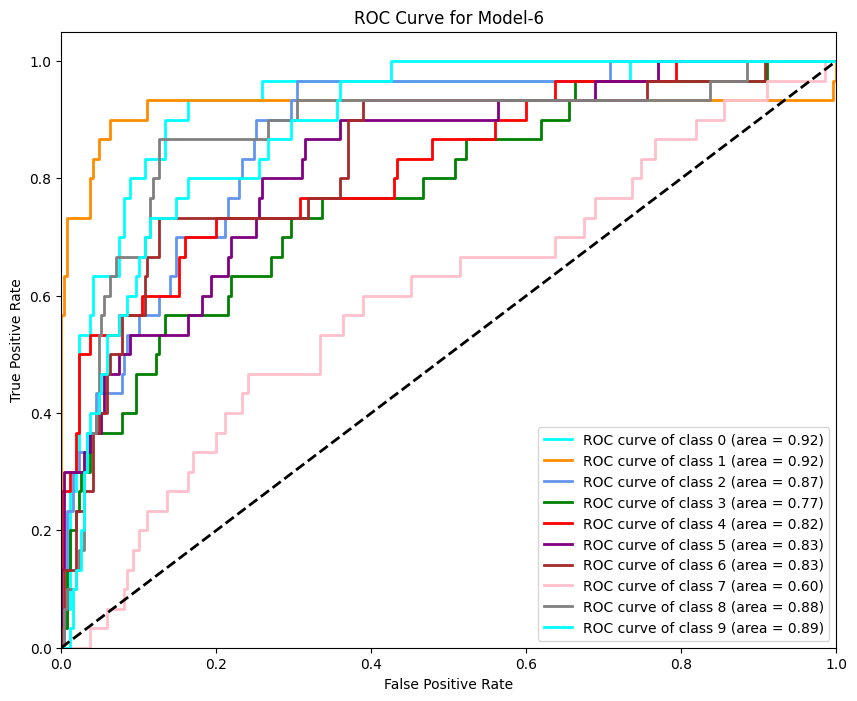

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Load data
# Assuming X_train, X_test, y_train, y_test are already defined and properly preprocessed

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Convert one-hot encoded y_train and y_test back to single column of class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Define the number of components for PCA
n_components = 100  # You can adjust this value as needed

# PCA transformer
pca = PCA(n_components=n_components)

# Modify the pipeline to include PCA
svm_classifier = SVC(kernel='linear', probability=True)
pipeline_with_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", pca),
    ("svm_classifier", svm_classifier)
])

# Fit the pipeline with PCA on training data
pipeline_with_pca.fit(X_train_features, y_train_labels)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_with_pca.predict(X_train_features)
train_accuracy_pca = accuracy_score(y_train_labels, y_train_pred_pca)
train_precision_pca = precision_score(y_train_labels, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train_labels, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train_labels, y_train_pred_pca, average='weighted')

print("Training Accuracy with PCA:", train_accuracy_pca*100,'%')
print("Training Precision with PCA:", train_precision_pca*100,'%')
print("Training Recall with PCA:", train_recall_pca*100,'%')
print("Training F1 Score with PCA:", train_f1_pca*100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_with_pca.predict(X_test_features)
test_accuracy_pca = accuracy_score(y_test_labels, y_test_pred_pca)
test_precision_pca = precision_score(y_test_labels, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test_labels, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test_labels, y_test_pred_pca, average='weighted')

print("Testing Accuracy with PCA:", test_accuracy_pca*100,'%')
print("Testing Precision with PCA:", test_precision_pca*100,'%')
print("Testing Recall with PCA:", test_recall_pca*100,'%')
print("Testing F1 Score with PCA:", test_f1_pca*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test_labels, classes=range(10))
y_test_pred_prob = pipeline_with_pca.predict_proba(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-6')
plt.legend(loc="lower right")
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step 
Training Accuracy with PCA: 100.0 %
Training Precision with PCA: 100.0 %
Training Recall with PCA: 100.0 %
Training F1 Score with PCA: 100.0 %
Testing Accuracy with PCA: 36.333333333333336 %
Testing Precision with PCA: 42.560920313293735 %
Testing Recall with PCA: 36.333333333333336 %
Testing F1 Score with PCA: 34.08548640759756 %


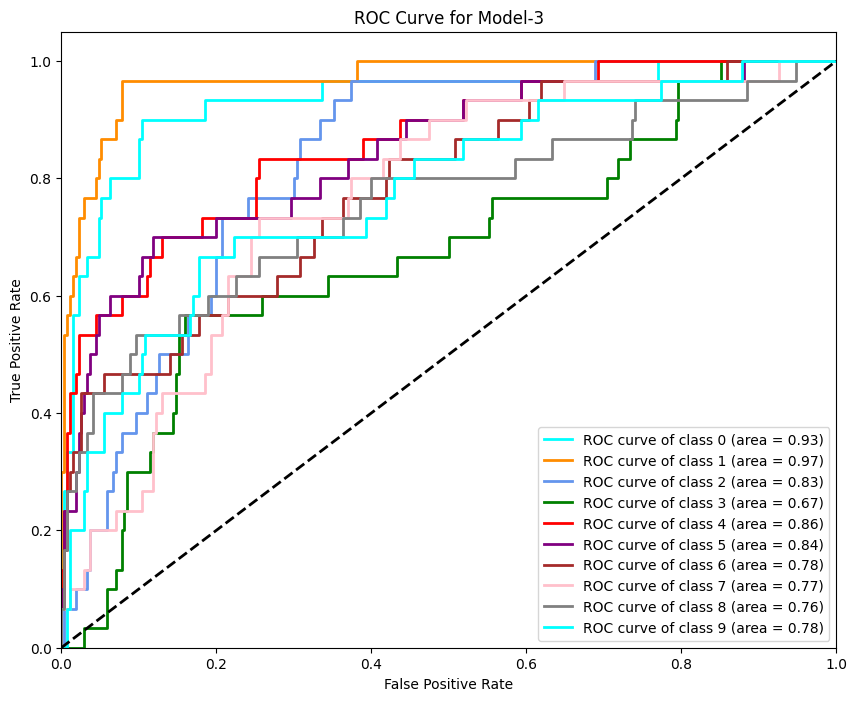

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Load data
# Assuming X_train, X_test, y_train, y_test are already defined and properly preprocessed

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Convert one-hot encoded y_train and y_test back to single column of class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Define the number of components for PCA
n_components = 100  # You can adjust this value as needed

# PCA transformer
pca = PCA(n_components=n_components)

# Modify the pipeline to include PCA
svm_classifier = SVC(kernel='linear', probability=True)
pipeline_with_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", pca),
    ("svm_classifier", svm_classifier)
])

# Fit the pipeline with PCA on training data
pipeline_with_pca.fit(X_train_features, y_train_labels)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_with_pca.predict(X_train_features)
train_accuracy_pca = accuracy_score(y_train_labels, y_train_pred_pca)
train_precision_pca = precision_score(y_train_labels, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train_labels, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train_labels, y_train_pred_pca, average='weighted')

print("Training Accuracy with PCA:", train_accuracy_pca*100,'%')
print("Training Precision with PCA:", train_precision_pca*100,'%')
print("Training Recall with PCA:", train_recall_pca*100,'%')
print("Training F1 Score with PCA:", train_f1_pca*100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_with_pca.predict(X_test_features)
test_accuracy_pca = accuracy_score(y_test_labels, y_test_pred_pca)
test_precision_pca = precision_score(y_test_labels, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test_labels, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test_labels, y_test_pred_pca, average='weighted')

print("Testing Accuracy with PCA:", test_accuracy_pca*100,'%')
print("Testing Precision with PCA:", test_precision_pca*100,'%')
print("Testing Recall with PCA:", test_recall_pca*100,'%')
print("Testing F1 Score with PCA:", test_f1_pca*100,'%')

# ROC curve
y_test_binarized = label_binarize(y_test_labels, classes=range(10))
y_test_pred_prob = pipeline_with_pca.predict_proba(X_test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model-3')
plt.legend(loc="lower right")
plt.show()
